In [1]:
import librosa
import librosa.display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
plt.rcParams["axes.facecolor"]= 'w'
plt.rcParams["axes.edgecolor"] = 'k'
plt.rcParams["savefig.dpi"] = 200


In [10]:
# Change kTask and then run the respective cell

kSR = 22050
kTask ='mastering'
kData = np.load('/home/code-base/user_space/models/data/plots/'+kTask+'.data.npy', allow_pickle=True)
audio = kData[0]
x = audio[0].copy()
kBlockSize = 64
if kTask is 'nonspeech':
    sec1=2
    sec2=6
elif kTask is 'distortion':
    sec1=0.35
    sec2=2
elif kTask is 'mastering':
    secs_trim = [25,12.7,22,6,6,25,40,22,20,30,21,32,40,35.25]
    sec1=secs_trim[10]
    sec2=sec1+4

sec1=int(sec1*kSR)
sec2=int(sec2*kSR)
t_audio = librosa.core.samples_to_time(np.linspace(0,len(x)-1,len(x)),
                                  sr=kSR)

<Figure size 1008x1008 with 0 Axes>

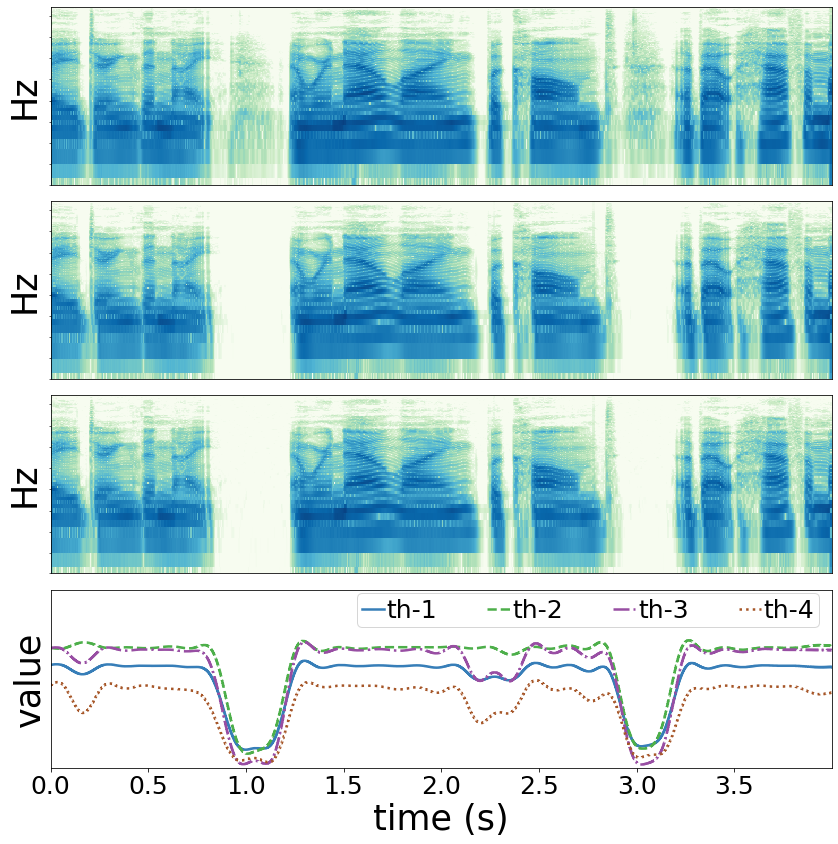

<Figure size 1008x1008 with 0 Axes>

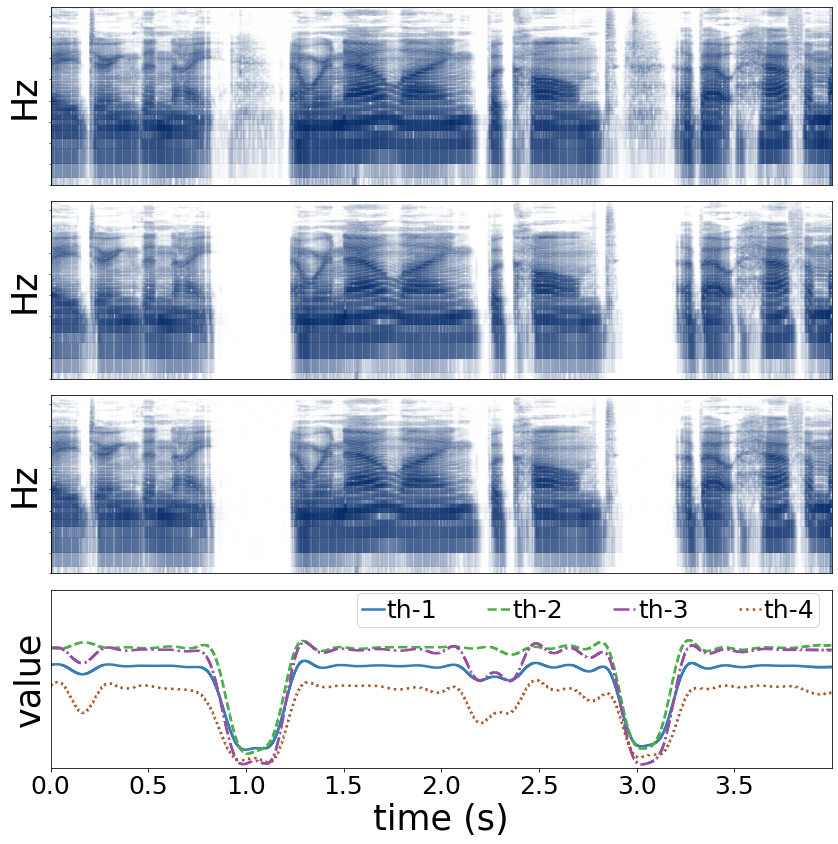

<Figure size 1008x1008 with 0 Axes>

In [9]:
# NONSPEECH

fig = plt.figure()
# plt.figure(figsize=(14, 6))
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams["axes.facecolor"]= 'w'
plt.rcParams["axes.edgecolor"] = 'k'
plt.rcParams["savefig.dpi"] = 200
kFont = 35
kTick = 25
save = False
from matplotlib.pylab import register_cmap, rc
cdict = {
    'red':   ((0.0,  1.0, 1.0), (1.0,  0.0, 0.0)),
    'green': ((0.0,  1.0, 1.0), (1.0,  .15, .15)),
    'blue':  ((0.0,  1.0, 1.0), (1.0,  0.4, 0.4)),
    'alpha': ((0.0,  0.0, 0.0), (1.0,  1.0, 1.0))}
register_cmap(name='InvBlueA', data=cdict)
sr = kSR
n_fft=512
hop_length=128
CMAPS = ['GnBu','InvBlueA']
for g in range(len(CMAPS)):
    audio = kData[0]
    parameters_resampled = kData[1]
    parameterNames = kData[2]
    p_plot = kData[3]
    n = len(audio)
    X = []
    X_db = []
    maxs = np.zeros((n,))
    mins = np.zeros((n,))
    maxs_t = np.zeros((n,))
    for i, x_ in enumerate(audio):
        X_ = librosa.stft(x_, n_fft=n_fft,hop_length=hop_length)
#         X_db_ = librosa.amplitude_to_db(abs(X_))
        X_db_ = librosa.power_to_db(abs(X_)**2)
        X.append(X_)
        X_db.append(X_db_)
        maxs[i] = np.max(X_db_)
        mins[i] = np.min(X_db_)
        maxs_t[i] = np.max(np.abs(x_))
    vmax = np.max(maxs)
    vmin = np.min(mins)
    tmax = np.max(maxs_t)
    fig = plt.figure()
    ax_ = fig.add_subplot(111)
    for i in range(n):
        ax = plt.subplot2grid((8, 1), (i*2, 0), rowspan=2)
        librosa.display.specshow(X_db[i], sr=sr, x_axis=None, y_axis='log',
                                 hop_length=hop_length, cmap=CMAPS[g], vmax=vmax, vmin=vmin)
        plt.ylabel('Hz',fontsize=kFont)
        ax.set_yticks([])
    ax = plt.subplot2grid((8, 1), (6, 0), rowspan=2)
    j=0
    idx = 0
    line_=['-','--','-.',':']
    colors=[plt.cm.Set1(1%20),plt.cm.Set1(2%20),plt.cm.Set1(3%20),plt.cm.Set1(6%20)]
    #parameter names
    parameterNames=['th-1','th-2','th-3','th-4']
#     parameterNames=['th-4','ratio-4','gain-4', 'knee-4']
#     parameterNames=['input-gain','gain-c-1','gain-eq-8','limit']
    for j,i in enumerate(p_plot):
        p = np.repeat(parameters_resampled[:,i], kBlockSize)
        ax.plot(t_audio[:4*kSR], p[sec1:sec2][:x.shape[0]][:4*kSR],
                 line_[j],
                 label=parameterNames[j],#jparameterNames[i],
                 linewidth=2.5, alpha=1, 
                color=colors[j])
    plt.margins(x=0)
    plt.xlabel('time (s)',fontsize=kFont)
    plt.ylabel('value',fontsize=kFont)
    ax.set_yticks([])
    plt.ylim(-0.01,0.8)
#     plt.ylim(-0.01,0.6)
#     plt.ylim(-0.01,1.3)
    legend = ax.legend(loc=1, bbox_to_anchor=(1, 1.05), fontsize=kTick, ncol=len(p_plot), borderpad=0.2,handletextpad=0.1,handlelength=0.9)
    plt.xticks(fontsize=kTick)
    plt.yticks(fontsize=kTick)
    ax_.set_yticks([])
    ax_.set_xticks([])
    ax_.spines['top'].set_visible(False)
    ax_.spines['right'].set_visible(False)
    ax_.spines['bottom'].set_visible(False)
    ax_.spines['left'].set_visible(False)
    plt.show()
    plt.tight_layout()
    if save:
#         fig.savefig('/home/code-base/user_space/models/data/plots/'+kTask+'_log_'+str(g)+'.pdf', format='PDF', transparent = False, dpi=200)
#         fig.savefig('/home/code-base/user_space/models/data/plots/'+kTask+'_linear_'+str(g)+'.pdf', format='PDF', transparent = False, dpi=200)
        plt.close(fig)
        print('plot saved')

<Figure size 1008x1008 with 0 Axes>

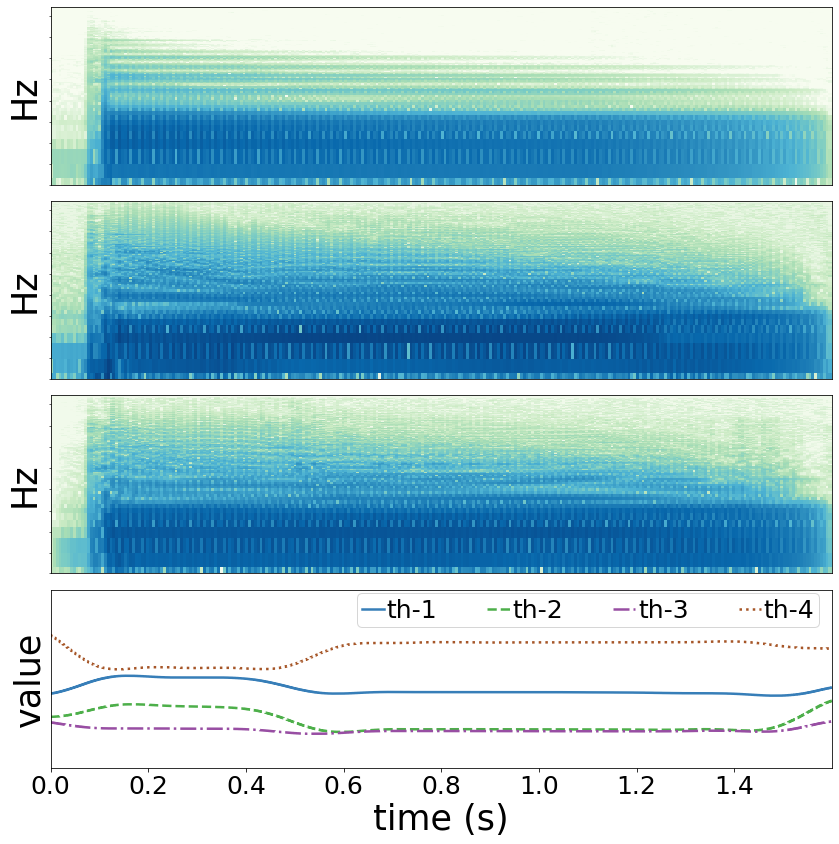

<Figure size 1008x1008 with 0 Axes>

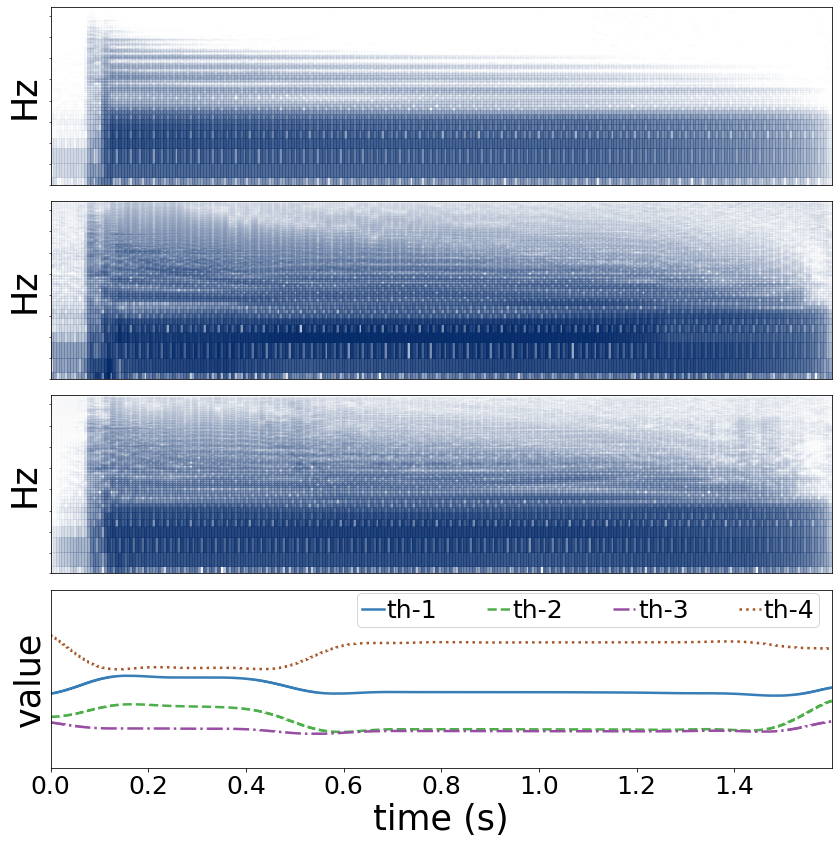

<Figure size 1008x1008 with 0 Axes>

In [6]:
# DISTORTION

fig = plt.figure()
# plt.figure(figsize=(14, 6))
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams["axes.facecolor"]= 'w'
plt.rcParams["axes.edgecolor"] = 'k'
plt.rcParams["savefig.dpi"] = 200
kFont = 35
kTick = 25
save = False
from matplotlib.pylab import register_cmap, rc
cdict = {
    'red':   ((0.0,  1.0, 1.0), (1.0,  0.0, 0.0)),
    'green': ((0.0,  1.0, 1.0), (1.0,  .15, .15)),
    'blue':  ((0.0,  1.0, 1.0), (1.0,  0.4, 0.4)),
    'alpha': ((0.0,  0.0, 0.0), (1.0,  1.0, 1.0))}
register_cmap(name='InvBlueA', data=cdict)
sr = kSR
n_fft=512
hop_length=128
CMAPS = ['GnBu','InvBlueA']
for g in range(len(CMAPS)):
    audio = kData[0]
    parameters_resampled = kData[1]
    parameterNames = kData[2]
    p_plot = kData[3]
    n = len(audio)
    X = []
    X_db = []
    maxs = np.zeros((n,))
    mins = np.zeros((n,))
    maxs_t = np.zeros((n,))
    for i, x_ in enumerate(audio):
        X_ = librosa.stft(x_, n_fft=n_fft,hop_length=hop_length)
#         X_db_ = librosa.amplitude_to_db(abs(X_))
        X_db_ = librosa.power_to_db(abs(X_)**2)
        X.append(X_)
        X_db.append(X_db_)
        maxs[i] = np.max(X_db_)
        mins[i] = np.min(X_db_)
        maxs_t[i] = np.max(np.abs(x_))
    vmax = np.max(maxs)
    vmin = np.min(mins)
    tmax = np.max(maxs_t)
    fig = plt.figure()
    ax_ = fig.add_subplot(111)
    for i in range(n):
        ax = plt.subplot2grid((8, 1), (i*2, 0), rowspan=2)
        librosa.display.specshow(X_db[i], sr=sr, x_axis=None, y_axis='log',
                                 hop_length=hop_length, cmap=CMAPS[g], vmax=vmax, vmin=vmin)
        plt.ylabel('Hz',fontsize=kFont)
        ax.set_yticks([])
    ax = plt.subplot2grid((8, 1), (6, 0), rowspan=2)
    j=0
    idx = 0
    line_=['-','--','-.',':']
    colors=[plt.cm.Set1(1%20),plt.cm.Set1(2%20),plt.cm.Set1(3%20),plt.cm.Set1(6%20)]
    #parameter names
    parameterNames=['th-1','th-2','th-3','th-4']
    for j,i in enumerate(p_plot):
        p = np.repeat(parameters_resampled[:,i], kBlockSize)
        ax.plot(t_audio[:4*kSR], p[sec1:sec2][:x.shape[0]][:4*kSR],
                 line_[j],
                 label=parameterNames[j],#jparameterNames[i],
                 linewidth=2.5, alpha=1, 
                color=colors[j])
    plt.margins(x=0)
    plt.xlabel('time (s)',fontsize=kFont)
    plt.ylabel('value',fontsize=kFont)
    ax.set_yticks([])
#     plt.ylim(-0.01,0.8)
    plt.ylim(-0.01,0.6)
#     plt.ylim(-0.01,1.3)
    legend = ax.legend(loc=1, bbox_to_anchor=(1, 1.05), fontsize=kTick, ncol=len(p_plot), borderpad=0.2,handletextpad=0.1,handlelength=0.9)
    plt.xticks(fontsize=kTick)
    plt.yticks(fontsize=kTick)
    ax_.set_yticks([])
    ax_.set_xticks([])
    ax_.spines['top'].set_visible(False)
    ax_.spines['right'].set_visible(False)
    ax_.spines['bottom'].set_visible(False)
    ax_.spines['left'].set_visible(False)
    plt.show()
    plt.tight_layout()
    if save:
#         fig.savefig('/home/code-base/user_space/models/data/plots/'+kTask+'_log_'+str(g)+'.pdf', format='PDF', transparent = False, dpi=200)
#         fig.savefig('/home/code-base/user_space/models/data/plots/'+kTask+'_linear_'+str(g)+'.pdf', format='PDF', transparent = False, dpi=200)
        plt.close(fig)
        print('plot saved')

<Figure size 1008x1008 with 0 Axes>

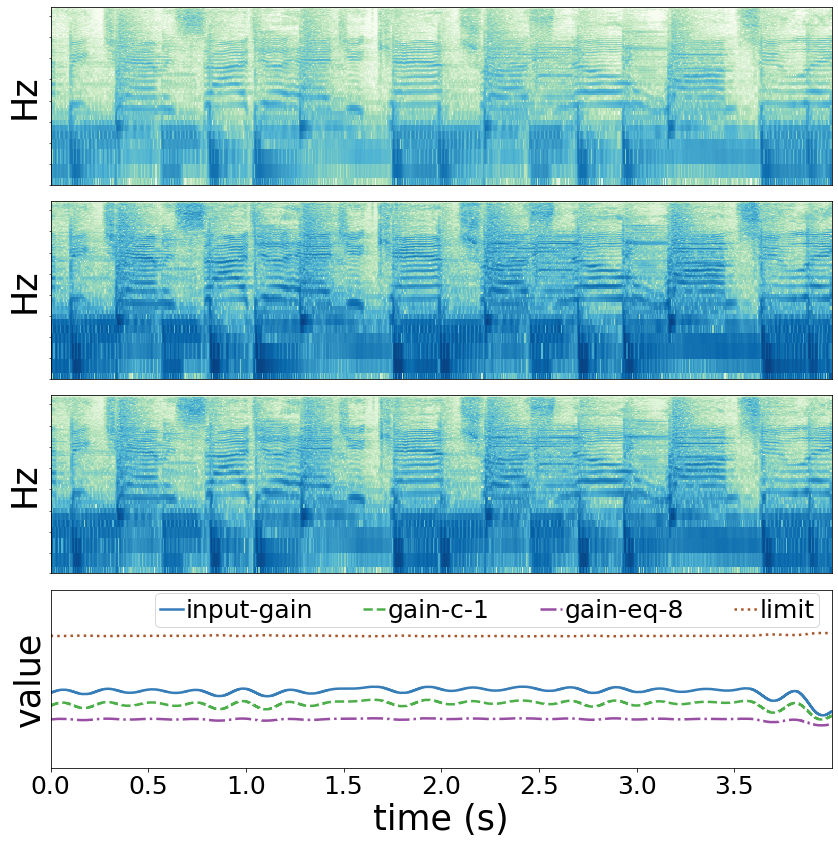

<Figure size 1008x1008 with 0 Axes>

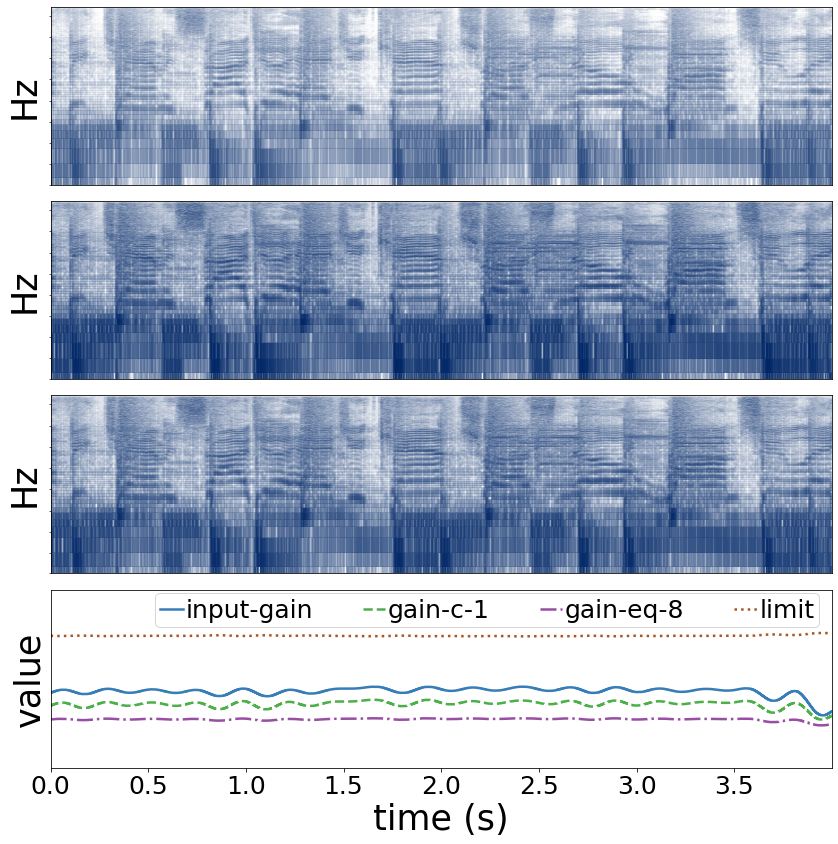

<Figure size 1008x1008 with 0 Axes>

In [11]:
# MASTERING

fig = plt.figure()
# plt.figure(figsize=(14, 6))
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams["axes.facecolor"]= 'w'
plt.rcParams["axes.edgecolor"] = 'k'
plt.rcParams["savefig.dpi"] = 200
kFont = 35
kTick = 25
save = False
from matplotlib.pylab import register_cmap, rc
cdict = {
    'red':   ((0.0,  1.0, 1.0), (1.0,  0.0, 0.0)),
    'green': ((0.0,  1.0, 1.0), (1.0,  .15, .15)),
    'blue':  ((0.0,  1.0, 1.0), (1.0,  0.4, 0.4)),
    'alpha': ((0.0,  0.0, 0.0), (1.0,  1.0, 1.0))}
register_cmap(name='InvBlueA', data=cdict)
sr = kSR
n_fft=512
hop_length=128
CMAPS = ['GnBu','InvBlueA']
for g in range(len(CMAPS)):
    audio = kData[0]
    parameters_resampled = kData[1]
    parameterNames = kData[2]
    p_plot = kData[3]
    n = len(audio)
    X = []
    X_db = []
    maxs = np.zeros((n,))
    mins = np.zeros((n,))
    maxs_t = np.zeros((n,))
    for i, x_ in enumerate(audio):
        X_ = librosa.stft(x_, n_fft=n_fft,hop_length=hop_length)
#         X_db_ = librosa.amplitude_to_db(abs(X_))
        X_db_ = librosa.power_to_db(abs(X_)**2)
        X.append(X_)
        X_db.append(X_db_)
        maxs[i] = np.max(X_db_)
        mins[i] = np.min(X_db_)
        maxs_t[i] = np.max(np.abs(x_))
    vmax = np.max(maxs)
    vmin = np.min(mins)
    tmax = np.max(maxs_t)
    fig = plt.figure()
    ax_ = fig.add_subplot(111)
    for i in range(n):
        ax = plt.subplot2grid((8, 1), (i*2, 0), rowspan=2)
        librosa.display.specshow(X_db[i], sr=sr, x_axis=None, y_axis='log',
                                 hop_length=hop_length, cmap=CMAPS[g], vmax=vmax, vmin=vmin)
        plt.ylabel('Hz',fontsize=kFont)
        ax.set_yticks([])
    ax = plt.subplot2grid((8, 1), (6, 0), rowspan=2)
    j=0
    idx = 0
    line_=['-','--','-.',':']
    colors=[plt.cm.Set1(1%20),plt.cm.Set1(2%20),plt.cm.Set1(3%20),plt.cm.Set1(6%20)]
    #parameter names
#     parameterNames=['th-1','th-2','th-3','th-4']
#     parameterNames=['th-4','ratio-4','gain-4', 'knee-4']
    parameterNames=['input-gain','gain-c-1','gain-eq-8','limit']
    for j,i in enumerate(p_plot):
        p = np.repeat(parameters_resampled[:,i], kBlockSize)
        ax.plot(t_audio[:4*kSR], p[sec1:sec2][:x.shape[0]][:4*kSR],
                 line_[j],
                 label=parameterNames[j],#jparameterNames[i],
                 linewidth=2.5, alpha=1, 
                color=colors[j])
    plt.margins(x=0)
    plt.xlabel('time (s)',fontsize=kFont)
    plt.ylabel('value',fontsize=kFont)
    ax.set_yticks([])
#     plt.ylim(-0.01,0.8)
#     plt.ylim(-0.01,0.6)
    plt.ylim(-0.01,1.3)
    legend = ax.legend(loc=1, bbox_to_anchor=(1, 1.05), fontsize=kTick, ncol=len(p_plot), borderpad=0.2,handletextpad=0.1,handlelength=0.9)
    plt.xticks(fontsize=kTick)
    plt.yticks(fontsize=kTick)
    ax_.set_yticks([])
    ax_.set_xticks([])
    ax_.spines['top'].set_visible(False)
    ax_.spines['right'].set_visible(False)
    ax_.spines['bottom'].set_visible(False)
    ax_.spines['left'].set_visible(False)
    plt.show()
    plt.tight_layout()
    if save:
#         fig.savefig('/home/code-base/user_space/models/data/plots/'+kTask+'_log_'+str(g)+'.pdf', format='PDF', transparent = False, dpi=200)
#         fig.savefig('/home/code-base/user_space/models/data/plots/'+kTask+'_linear_'+str(g)+'.pdf', format='PDF', transparent = False, dpi=200)
        plt.close(fig)
        print('plot saved')

In [4]:
import os 
import time

import librosa
import librosa.display
import sox
import sklearn

import soundfile as sf
import numpy as np
import scipy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K

from deepafx import dafx_layer
from deepafx import mix_snr
from deepafx import lv2_plugin
from deepafx import utils
from deepafx import layers
from deepafx import models
from deepafx import generators

import IPython.display as ipd
import matplotlib.pyplot as plt 

tf.random.set_seed(0)
np.random.seed(0)

# import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,7)
plt.rcParams["axes.facecolor"]= 'w'
plt.rcParams["axes.edgecolor"] = 'k'
plt.rcParams["savefig.dpi"] = 200



def evaluate(model_id, path_model, name_task):
    
    kPathModels = path_model
    kFullModel = 'full_model_%s' % model_id
    kTask = name_task # distortion or nonspeech or mastering
    
    # If folder doesn't exist, then create it.
    if not os.path.isdir(kPathModels+'results/'):
        os.makedirs(kPathModels+'results/')
        print("created folder : ", kPathModels+'results/')
    
    # loads config
    k = np.load(kPathModels+kFullModel+'.params.npy', allow_pickle=True).item()
    
    # Define Constants
    kPathAudio = k['path_audio']
    if kTask is not 'mastering':
        kXRecording = k['x_recording']
        kYRecording = k['y_recording']
    kSR = k['sr']
    kNumSamples = k['num_samples']
    kBatchSize = k['batch_size']
    kStepsPerEpoch = k['steps_per_epoch']
    kEpochs = k['epochs']
    kPatience = k['patience']
    kHopSamples = k['hop_samples']
    kGradientMethod = k['gradient_method'] 
    kComputeSignalGradient = k['compute_signal_gradient']
    kMultiprocess = k['multiprocess']
    kParams = k['params']
    kPluginUri = k['plugin_uri']
    kParamMap = k['param_map']
    kOutputLength = k['output_length']
    kStereo = k['stereo']
    kSetNonTrainableParameters = k['set_nontrainable_parameters']
    kNewParameterRange = k['new_parameter_range']
    kPathModels = k['path_models']
    kFxChain = k['fx_chain']
    kGreedyDafxPretraining = k['greedy_dafx_pretraining']
    kDefaultPretraining = k['default_pretraining']
    kEncoder = str(k['encoder'])
    
    return kEncoder

#     # plot training losses (if saved, i.e. if training finished)
    
#     try:
#         print('Saving plot with training losses...')
#         history_ = []
#         history_val = []
#         epoch_ =[]
#         for i in range(1,len(kParams)+1):
#             history = np.load(kPathModels+kFullModel+f'.history_{i}.npy', allow_pickle=True).item()
#             plt.figure(figsize=(7, 7))
#             history_.append(history['loss'])
#             history_val.append(history['val_loss'])
#             epoch_.append(len(history['loss']))
#             print('min loss %.5f @ epoch %d' %(np.min(history['loss']), 1+np.argmin(history['loss'])))
#             print('min val_loss %.5f @ epoch %d' %(np.min(history['val_loss']), 1+np.argmin(history['val_loss'])))
#         history_ = [item for sublist in history_ for item in sublist]
#         history_val = [item for sublist in history_val for item in sublist]
        
#         plt.figure(figsize=(14, 7))
#         plt.plot(history_, label='loss')
#         plt.plot(history_val, label='val_loss')
#         epoch=0
#         for i in epoch_: 
#             plt.axvline(x=i+epoch, c='c')
#             epoch+=i
#         plt.legend(fontsize=20)
#         plt.xlabel('epoch',fontsize=20)
#         plt.ylabel('loss',fontsize=20)
#         plt.tight_layout()
#         plt.savefig(kPathModels+'results/'+'training_loss.pdf')
#         plt.show()
#         plt.close()
        
 
#     except:
#         print('history not saved')
        
#    # Load test dataset or makes partition, for some tasks random_state seed should be the same as in training script

#     if kTask is 'nonspeech':

#         xPathFiles = utils.getFilesPath(os.path.join(kPathAudio,kXRecording), '*.wav')
#         xTest = []
#         for path in xPathFiles:
#             if 'f9' in path or 'm9' in path:
#                 xTest.append(path)
                
#         xTestAudio = []
#         for path in xTest:
#             audio, _ = sf.read(path)
#             xTestAudio.append(audio)

#         yPathFiles = utils.getFilesPath(os.path.join(kPathAudio,kYRecording), '*.wav')
#         yTest = []
#         for path in yPathFiles:
#             if 'f9' in path or 'm9' in path:
#                 yTest.append(path)

#         yTestAudio = []
#         for path in yTest:
#             audio, _ = sf.read(path)
#             yTestAudio.append(audio)

#         xTestAudio = utils.highpassFiltering(xTestAudio, 100, kSR)
#         yTestAudio = utils.highpassFiltering(yTestAudio, 100, kSR)

#     elif kTask is 'distortion':
        
#         xPathFiles = utils.getFilesPath(os.path.join(kPathAudio,kXRecording), '*.wav')
#         yPathFiles = utils.getFilesPath(os.path.join(kPathAudio,kYRecording), '*.wav')

#         xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(xPathFiles,
#                                                             yPathFiles,
#                                                             test_size=0.10,
#                                                             random_state=0)

#         xTrain, xValid, yTrain, yValid = sklearn.model_selection.train_test_split(xTrain,
#                                                             yTrain,
#                                                             test_size=0.11111111111,
#                                                             random_state=0)

#         xTestAudio = []
#         for path in xTest:
#             audio, _ = sf.read(path)
#             xTestAudio.append(audio)

#         yTestAudio = []
#         for path in yTest:
#             audio, _ = sf.read(path)
#             yTestAudio.append(audio)

#     elif kTask is 'mastering':
        
#         kPathFiles = utils.getFilesPath(kPathAudio, '*.wav')

#         xPathFiles = []
#         yPathFiles = []
#         for path in kPathFiles:
#             name = path.split('/')[-1]
#             recording = name.split('-')[0]
#             if recording[-1] is 'a':
#                 xPathFiles.append(path)
#             elif recording[-1] is 'b':
#                 yPathFiles.append(path)
#         xPathFiles.sort()
#         yPathFiles.sort()

#         xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(xPathFiles,
#                                                             yPathFiles,
#                                                             test_size=0.10,
#                                                             random_state=0)

#         xTrain, xValid, yTrain, yValid = sklearn.model_selection.train_test_split(xTrain,
#                                                             yTrain,
#                                                             test_size=0.11111111111,
#                                                             random_state=0)

#         xTestAudio = []
#         for path in xTest:
#             audio, _ = sf.read(path)
#             audio = librosa.core.to_mono(audio.T)
#             audio = utils.lufs_normalize(audio, kSR, -25.0)
#             xTestAudio.append(audio)

#         yTestAudio = []
#         for path in yTest:
#             audio, _ = sf.read(path)
#             audio = librosa.core.to_mono(audio.T)
#             yTestAudio.append(audio)
            

#     # Creates model
#     print('Creating models...')
#     model, encoder, dafx = models.deepAFx(kNumSamples,
#                                             kSR,
#                                             kHopSamples,
#                                             kBatchSize,
#                                             kParams,
#                                             kPluginUri,
#                                             kParamMap,
#                                             kGradientMethod,
#                                             kComputeSignalGradient,
#                                             kMultiprocess,
#                                             kEncoder,
#                                             output_length=kOutputLength,
#                                             stereo=kStereo, 
#                                             non_learnable_params_settings=kSetNonTrainableParameters,
#                                             new_params_range=kNewParameterRange,
#                                             fx_chain=kFxChain)
    
#     # Creates generators

#     if kTask is 'nonspeech':

#         genTest = generators.Data_Generator_Stateful_Nonspeech(xTestAudio, yTestAudio, dafx,
#                                                kBatchSize,
#                                                kNumSamples,
#                                                steps_per_epoch=kStepsPerEpoch,
#                                                sr=kSR,
#                                                pad=0,
#                                                crop=True,
#                                                output_length=kOutputLength,
#                                                large_frame_length_secs=10, augment=True)

#     elif kTask is 'distortion':

#         genTest = generators.Data_Generator_Stateful_Distortion(xTestAudio, yTestAudio, dafx,
#                                                kBatchSize,
#                                                kNumSamples,
#                                                steps_per_epoch=kStepsPerEpoch,
#                                                sr=kSR,
#                                                pad=0,
#                                                crop=True,
#                                                output_length=kOutputLength,
#                                                center_frames=True)

#     elif kTask is 'mastering':

#         genTest = generators.Data_Generator_Stateful_Mastering(xTestAudio, yTestAudio, dafx,
#                                                kBatchSize,
#                                                kNumSamples,
#                                                steps_per_epoch=kStepsPerEpoch,
#                                                sr=kSR,
#                                                pad=0,
#                                                crop=True,
#                                                output_length=kOutputLength,
#                                                large_frame_length_secs=10, augment=False)
        
#     # Loss_function
#     spectral_loss = layers.multiScaleSpectralLoss(loss_type='L2',
#                                                    mag_weight=1.,
#                                                    logmag_weight=1.,
#                                                    time_loss=True,
#                                                    time_loss_type='L1',
#                                                    time_loss_weight=10.0,
#                                               fft_sizes=(1024,),
#                                              overlap=0.0,
#                                              time_shifting=True,
#                                              batch_size=kBatchSize)

#     # Compile

#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#                        loss=spectral_loss,
#                        metrics=['mae'])
    
#     model.summary()
    
#     dafx.shutdown()
#     del model, encoder, genTest

evaluate(7, '/home/code-base/scratch_space/models/distortion/', 'distortion')

















# # Testing

# K.set_learning_phase(0)

# genTest = generators.Data_Generator_Sequential(xTestAudio, yTestAudio, dafxs,
#                                                kBatchSize,
#                                                kNumSamples,
#                                                steps_per_epoch=kStepsPerEpoch,
#                                                sr=kSR,
#                                                pad=kLatency,
#                                                snr_db=kSNRdB,
#                                                crop=kCrop,
#                                                output_length=kOutputLength,large_frame_length_secs=10)

# model, mobilenet, dafxs = models.dafx_mobilenet_mono_sequential(kNumSamples+kLatency,
#                                                                            kSR,
#                                                                            kHopSamples,
#                                                                            kBatchSize,
#                                                                            kParams,
#                                                                            kPluginUri,
#                                                                            kParamMap,
#                                                                            kGradientMethod,
#                                                                            kComputeSignalGradient,
#                                                                            kMultiprocess,
#                                                                            output_length=kOutputLength,
#                                                                            stereo=kStereo, 
#                                                                            non_learnable_params_settings=kSetNonTrainableParameters,
#                                                                            new_params_range=kNewParameterRange,
#                                                                            fx_chain=kFxChain)

# spectral_loss = layers.multiScaleSpectralLoss(loss_type='L2',
#                                                    mag_weight=1.,
#                                                    logmag_weight=1.,
#                                                    time_loss=True,
#                                                    time_loss_type='L1',
#                                                    time_loss_weight=10.0,
#                                               fft_sizes=(1024,),
#                                              overlap=0.0,
#                                              time_shifting=True,
#                                              batch_size=kBatchSize)

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#                        loss=spectral_loss,
# #                        loss='mae',
#                        metrics=['mae']
#              )

# model.load_weights(kPathModels+kFullModel+f'_chk_{i}.h5')

# score = model.evaluate(genTest,
#                        steps=int(kStepsPerEpoch*0.1),
#                        batch_size=kBatchSize,
#                        verbose=1,
#                        return_dict=True)
# k['test'] = score
# np.save(kPathModels+kFullModel+'.params', k)


# for dafx in dafxs:
#     dafx.shutdown()
# del model, mobilenet

# for param in k.keys():
#     print(param, k[param])

'mobilenet'

In [7]:
s = 'mobilenet'

In [5]:
kEncoder = evaluate(7, '/home/code-base/scratch_space/models/distortion/', 'distortion')


In [6]:
kEncoder

'mobilenet'

In [10]:
s.dtype()

AttributeError: 'str' object has no attribute 'dtype'

In [9]:
kEncoder.dtype()

AttributeError: 'str' object has no attribute 'dtype'

In [13]:
if kEncoder == s:
    print('yaya')

yaya
